In [1]:
from sage.plot.scatter_plot import ScatterPlot

In [2]:
var("c, x, y, z, t,j")

(c, x, y, z, t, j)

In [3]:
def f(c, z):
    return z^2 + c
def fn(n, c, z):
    if n == 0:
        return z
    else:
        return f(c, fn(n-1, c, z))

In [4]:
f(1, 2)

5

In [5]:
@interact
def one_box(c=-3/4-0.825, n=11, auto_update=False):
    pPlus = (1/2)*(1+sqrt(1-4*c))
    pMinus = (1/2)*(1-sqrt(1-4*c))
    funp = plot([fn(n, c, t), t], (t, 0 - pPlus, pPlus+0), axes_labels=['f','x'], aspect_ratio=1)
    #funp = funp + list_plot([[-pPlus,0],[ pMinus, pMinus ],[pMinus, 0], [pPlus,pPlus], [pPlus,0]])
    funp = funp + line([[pPlus,pPlus] ,[-pPlus,pPlus], [-pPlus,-pPlus], [pPlus, -pPlus], [pPlus,pPlus]], color='red')
    show(funp,figsize=(8,8))


Manual interactive function <function one_box at 0x79fffe626050> with 2 widgets
  c: FloatSlider(value=-1.575,…

In [6]:
@interact
def one_box_bounded(c=-3/4-0.825, n=11, auto_update=False):
    pPlus = (1/2)*(1+sqrt(1-4*c))
    pMinus = (1/2)*(1-sqrt(1-4*c))
    funp = plot([fn(n, c, t), t], (t, 0 - pPlus, pPlus+0), ymin=-pPlus, ymax=pPlus, axes_labels=['f','x'], aspect_ratio=1)
    #funp = funp + list_plot([[-pPlus,0],[ pMinus, pMinus ],[pMinus, 0], [pPlus,pPlus], [pPlus,0]])
    funp = funp + line([[pPlus,pPlus] ,[-pPlus,pPlus], [-pPlus,-pPlus], [pPlus, -pPlus], [pPlus,pPlus]], color='red')
    show(funp,figsize=(8,8))


Manual interactive function <function one_box_bounded at 0x79fff2dd9bd0> with 2 widgets
  c: FloatSlider(value…

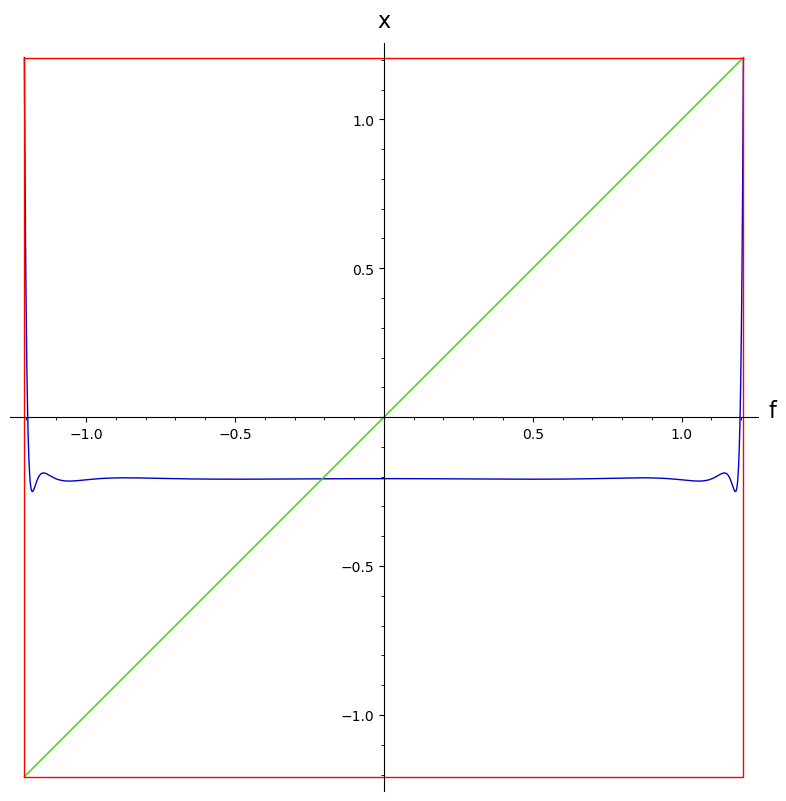

In [7]:
one_box_bounded(-1/4,6)

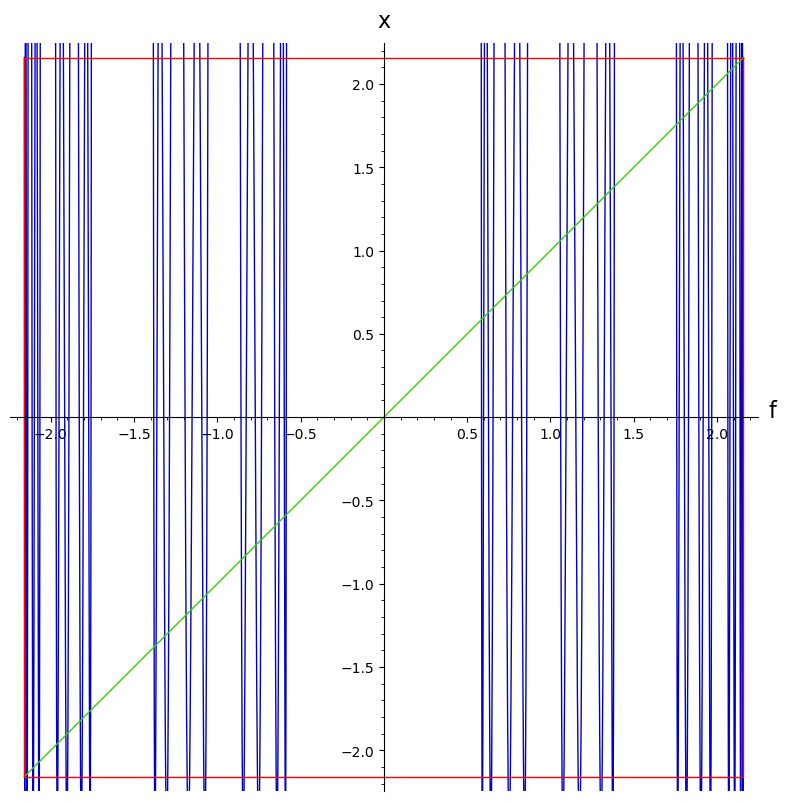

In [8]:
one_box_bounded(-5/2,6)

In [9]:
z,c = var('z,c')
result = fn(6,c,z)
show(result)

(((((z^2 + c)^2 + c)^2 + c)^2 + c)^2 + c)^2 + c

{'aspect_ratio': 2}
about to plot f from/to  -2.24990250662492 2.24981251512462


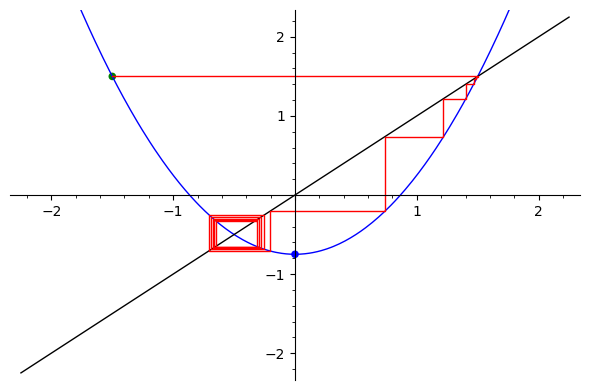

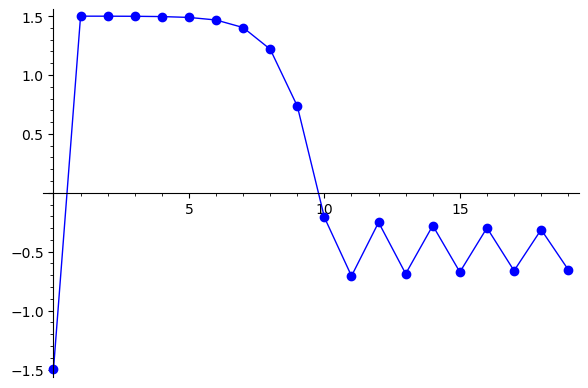

In [10]:

def plot_iteration(f, c, N, x, **kwargs):
    
    x0 = x
    
    mins = x
    maxs = x

    print(kwargs)
    
    zigzag = []
    for k in range(N):
        y = f(c, x)
        mins = min(mins, y)
        maxs = max(maxs, y)
        zigzag.append([x, y])
        if x == y:
           print("Fixed point", x, " after ", k+1, " steps.")
           break
        zigzag.append([y, y])
        x = y
    
    bufw = max( (maxs-mins)*(0.25), 0.000000001 )
    mins = mins-bufw
    maxs = maxs+bufw
    
    
    
#    p1 = plot(kwargs)
    idline = line([[mins,mins], [maxs, maxs]], color='black')
    print("about to plot f from/to ", mins, maxs)
    p1 = plot(f(c, t), (t, mins, maxs), xmin=mins, xmax=maxs, ymin=mins, ymax=maxs)
    p1 = p1 + idline 
    p1 = p1 + line(zigzag,  color='red')
    p1 = p1 + list_plot([[x0,f(c,x0)]],  color='green', size=30)
    p1 = p1 + list_plot([[0,c]],  color='blue', size=30)
    plist = [zigzag[2*k][0] for k in range(int(len(zigzag)/2))]
    p2 = list_plot(plist, plotjoined=True, marker="o")
   
    return(p1,p2)

p1, p2 = plot_iteration(f, -3/4+0.00001, 20,  (-3/4+0.0000249985)*2, aspect_ratio=2)
show(p1)
show(p2)

In [11]:
def plot_iteration_box(f, c, N, x, **kwargs):
    
    if c > 1/4:
        print("No fixed points. All orbits escape. Goodbye")
        return
    
    pPlus = (1/2)*(1+sqrt(1-4*c))
    
    print("c= ", c, "x= ", x)
    
    print("p+ = ", pPlus)
    
    p1 = line([[pPlus,pPlus] ,[-pPlus,pPlus], [-pPlus,-pPlus], [pPlus, -pPlus], [pPlus,pPlus]], color='red', aspect_ratio=1)
    
    x0 = x
    
    mins = x
    maxs = x

    print(kwargs)
    
    zigzag = []
    for k in range(N):
        y = f(c, x)
        mins = min(mins, y)
        maxs = max(maxs, y)
        zigzag.append([x, y])
        if x == y:
           print("Fixed point", x, " after ", k+1, " steps.")
           break
        zigzag.append([y, y])
        x = y
    
    bufw = max( (maxs-mins)*(0.25), 0.000000001 )
    mins = mins-bufw
    mins = min(mins,-pPlus)
    maxs = maxs+bufw
    maxs = max(maxs,pPlus)
    
    p1 = p1 + line([[mins,mins], [maxs, maxs]], color='black')
    print("about to plot f from/to ", mins, maxs)
    p1 = p1 + plot(f(c, t), (t, mins, maxs), xmin=mins, xmax=maxs, ymin=mins, ymax=maxs, aspect_ratio=1)
    idline = line([[mins,mins], [maxs, maxs]], color='black')
    p1 = p1 + idline 
    p1 = p1 + line(zigzag,  color='red')
    p1 = p1 + list_plot([[x0,f(c,x0)]],  color='green', size=30)
    p1 = p1 + list_plot([[0,c]],  color='blue', size=30)

    plist = [zigzag[2*k][0] for k in range(int(len(zigzag)/2))]
    p2 = list_plot(plist, plotjoined=True, marker="o")
    
    diffs = ([kkk, plist[-1]-plist[-(kkk)-1]] for kkk in range(min(200,len(plist))))
    #print( [ [d[0], log( max(0.000000001, abs(d[1]) ) )] for d in diffs]  )
    #show(scatter_plot([ [d[0], log(abs(d[1]))] for d in diffs]))
    #for pp in diffs:
    #    print(pp)
   
    return(p1,p2)
@interact
def pib( c=(-2.0,0.25), N=(0,1000), x=(-2.0,0.250), auto_update=False):
    p1, p2 =plot_iteration_box(f,c,N,x,aspect_ratio=2)
#p1, p2 = plot_iteration_box(f, -3/4+0.00001, 20,  (-3/4+0.0000249985)*2, aspect_ratio=2)
    show(p1)
    show(p2)

Manual interactive function <function pib at 0x79fff0f4a440> with 3 widgets
  c: FloatSlider(value=-0.875, des…

c=  0.250000000000000 x=  0
p+ =  0.500000000000000
{}
about to plot f from/to  -0.500000000000000 0.597573431864071


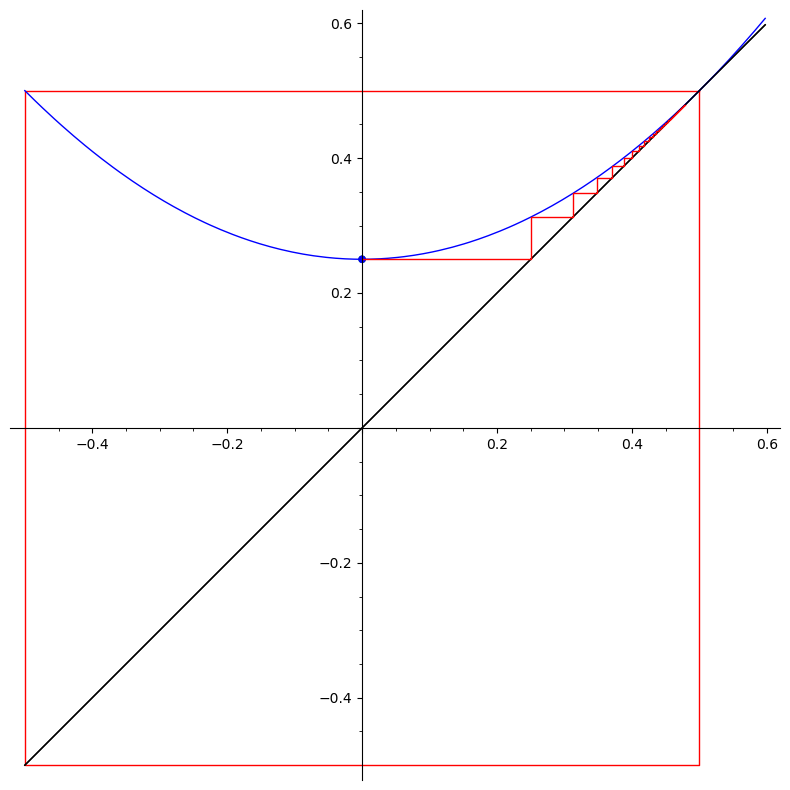

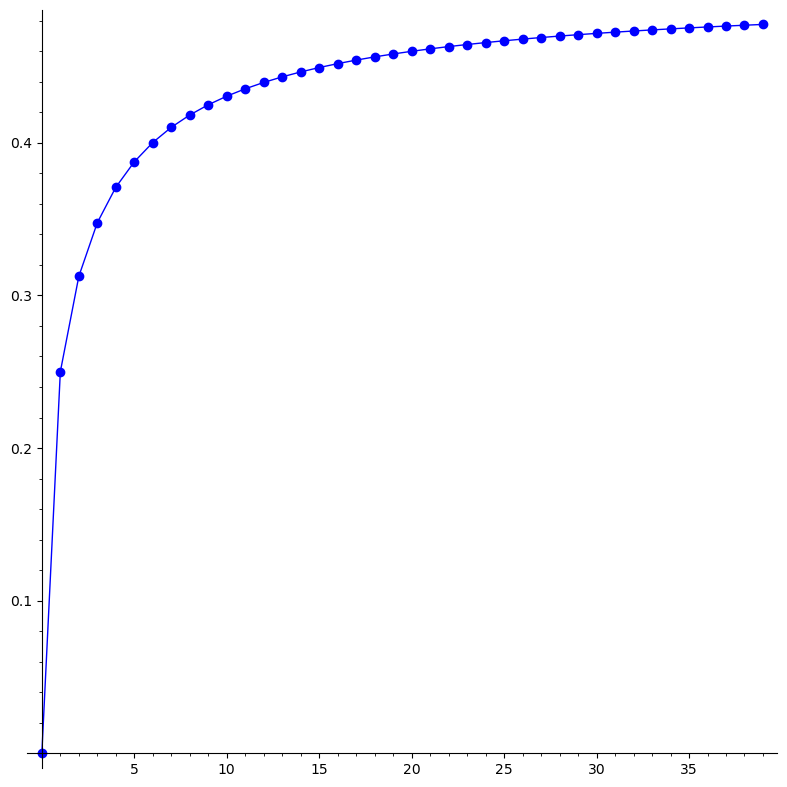

In [12]:
p1, p2 = plot_iteration_box(f,0.25,40,0)
show(p1, figsize=(8,8))
show(p2, figsize=(8,8))

c=  -1.77500000000000 x=  0
p+ =  1.92302494707577
{}
about to plot f from/to  -2.56265625000000 2.16328125000000


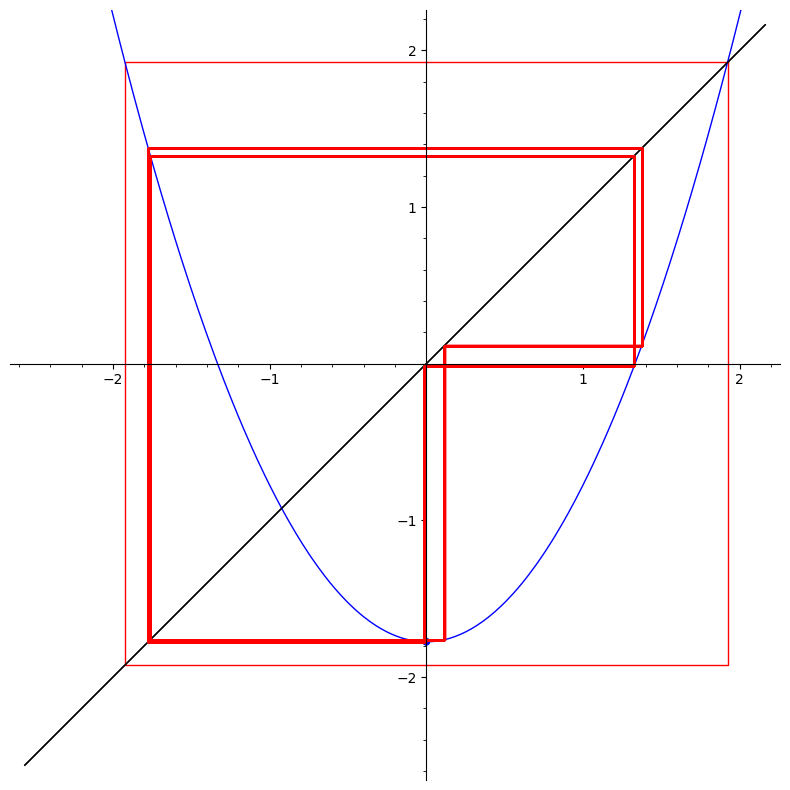

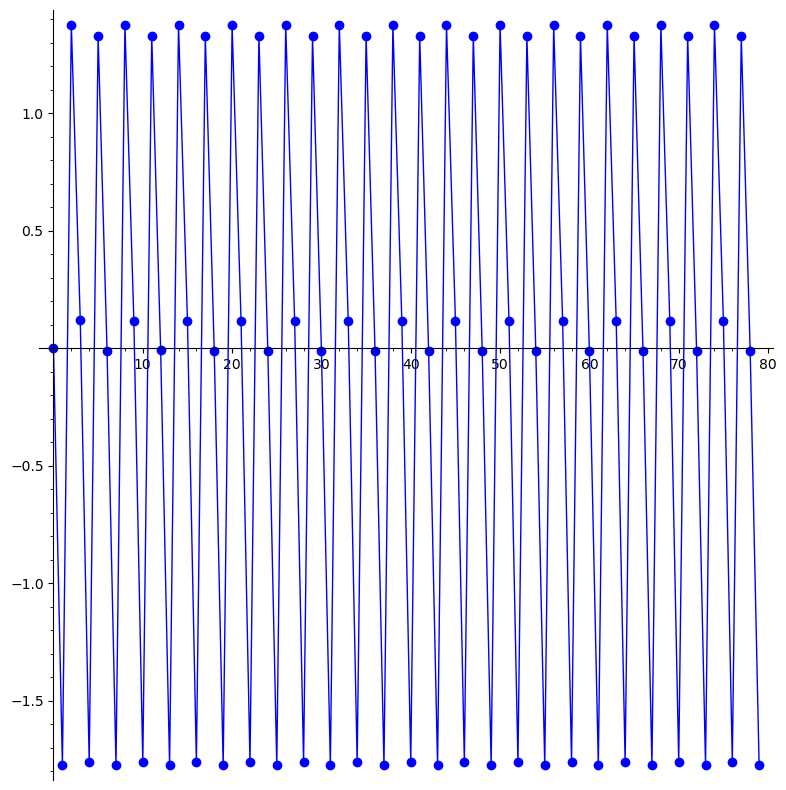

In [13]:
p1, p2 = plot_iteration_box(f, -1.775, 80, 0)
show(p1,figsize=(8,8))
show(p2,figsize=(8,8))

c=  -1.31000000000000 x=  0
p+ =  1.74899959967968
{'aspect_ratio': 2}
about to plot f from/to  -1.74899959967968 1.74899959967968


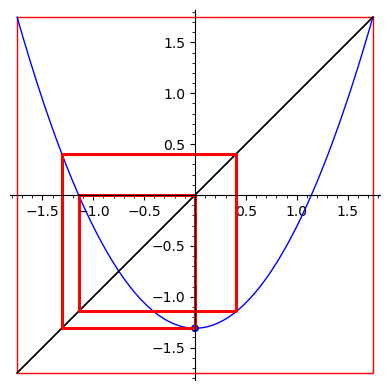

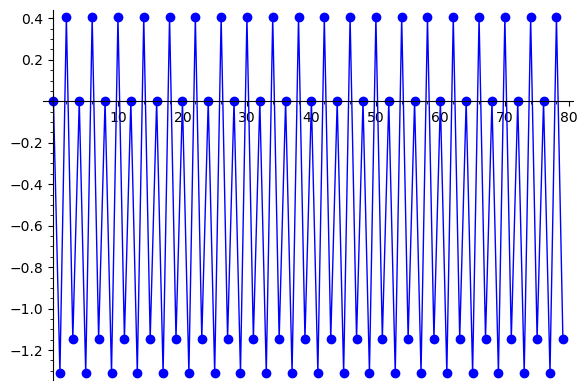

In [14]:
p1, p2 = plot_iteration_box(f, -1.31, 80, 0, aspect_ratio=2)
show(p1)
show(p2)

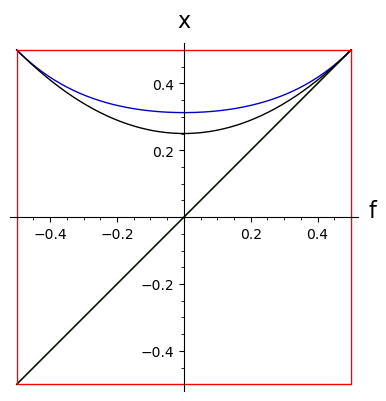

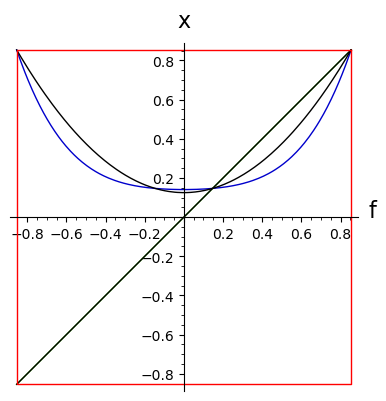

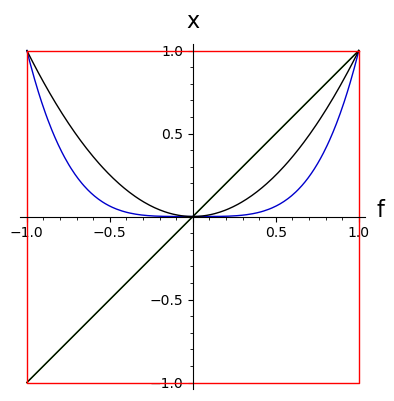

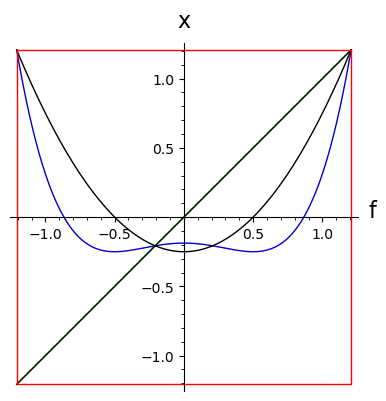

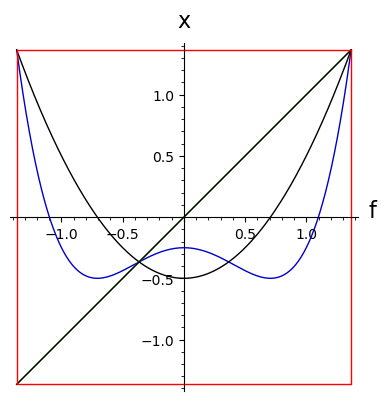

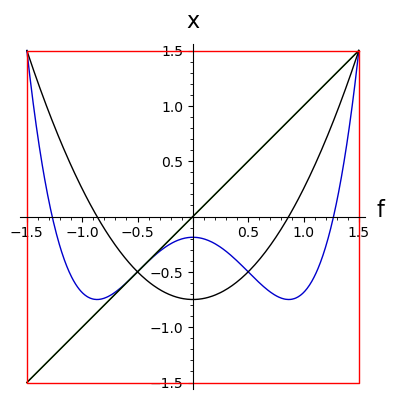

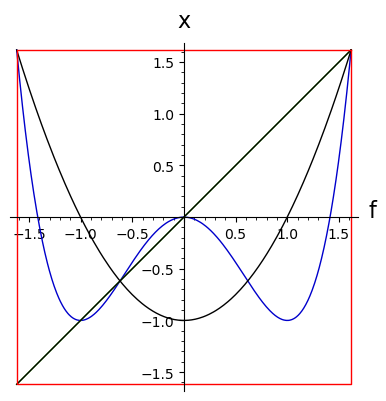

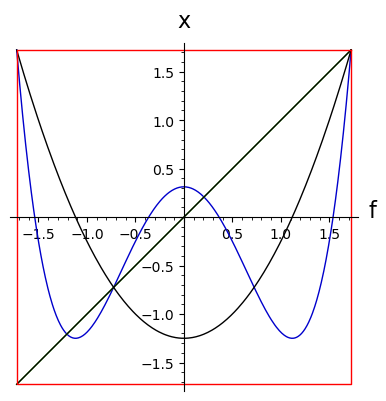

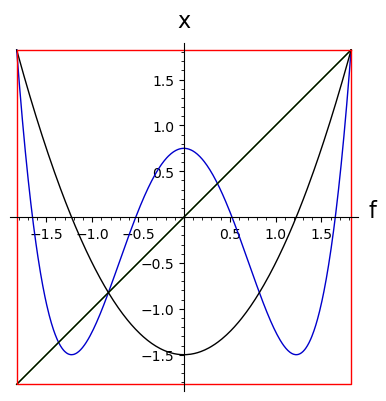

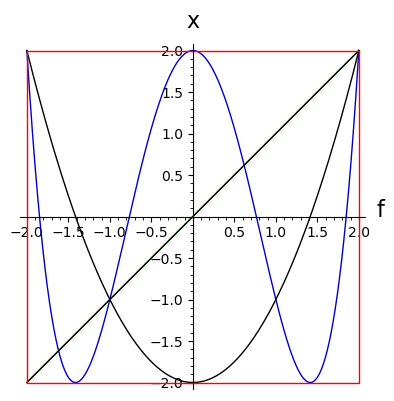

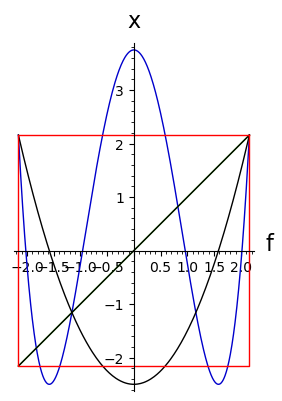

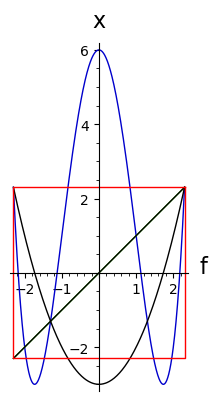

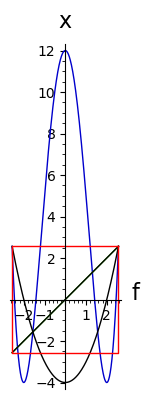

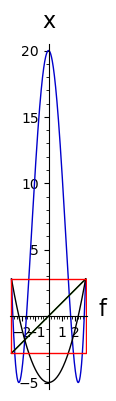

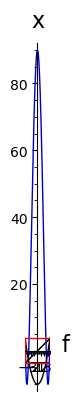

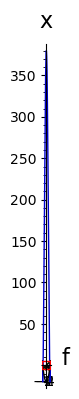

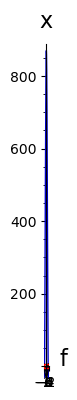

In [15]:
i, n, c = var('i, n, c')

def boxview():
    for i in [-0.25,-0.125,0, 1/4,1/2,3/4,1,5/4,3/2,2,2.5,3,4,5,10,20,30]:
#        n = 2.0
        c = 0.0- (1.0)*i


        pPlus = (1/2)*(1+sqrt(1-4*c))
        pMinus = (1/2)*(1-sqrt(1-4*c))
        funp = plot([fn(2, c, t), t], (t, 0.0 - pPlus, pPlus+0), axes_labels=['f','x'], aspect_ratio=1)
        funp = funp+plot([fn(1, c, t), t], (t, 0.0 - pPlus, pPlus+0), axes_labels=['f','x'], aspect_ratio=1,color='black')
#        funp = funp + list_plot([[-pPlus,0],[ pMinus, pMinus ],[pMinus, 0], [pPlus,pPlus], [pPlus,0]])
        funp = funp + line([[pPlus,pPlus] ,[-pPlus,pPlus], [-pPlus,-pPlus], [pPlus, -pPlus], [pPlus,pPlus]], color='red')
        show(funp)
boxview()

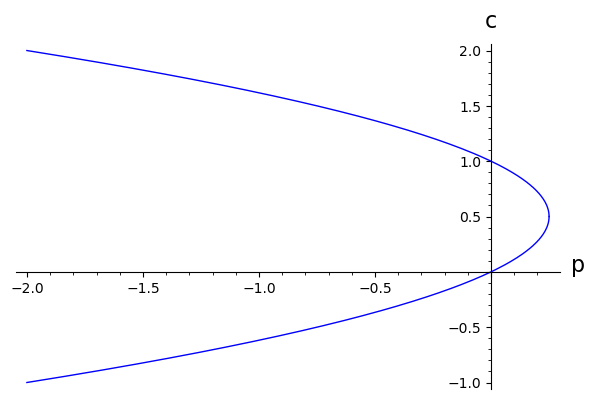

In [16]:
c = var('c')
def pPlus(c):
    return (1/2)*(1+sqrt(1-4*c))
def pMinus(c):
    return (1/2)*(1-sqrt(1-4*c))
plot(pPlus(c),(c, -2,1/4), axes_labels=['p','c'])+plot(pMinus(c),(c,-2,1/4))

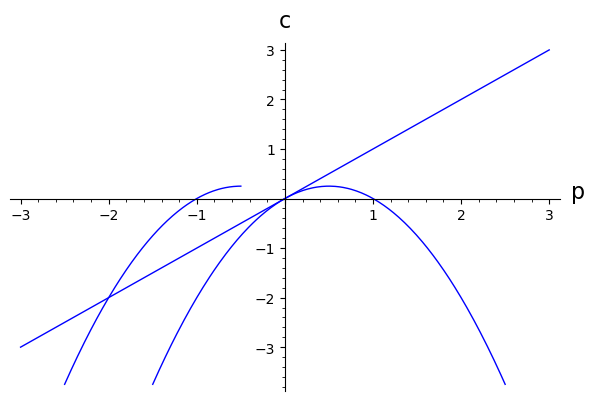

In [17]:
p, tp = var('p','tp')
func = plot( (p-p^2), (p, -1.5, 2.5), axes_labels=['p','c']) + plot(p, (p, -3,3))+plot((-tp-tp^2), (tp, -5/2, -1/2))
show(func)

In [18]:
def plot_show(f, c, n, x):
    p1, p2 = plot_iteration_box(f, c, n, x)
    show(p1)
    show(p2)

c=  -1.50000000000000 x=  0
p+ =  1.82287565553230
{}
about to plot f from/to  -2.06250000000000 1.82287565553230


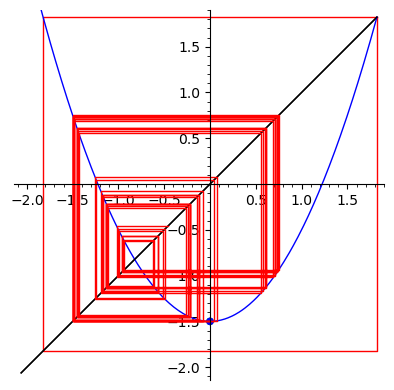

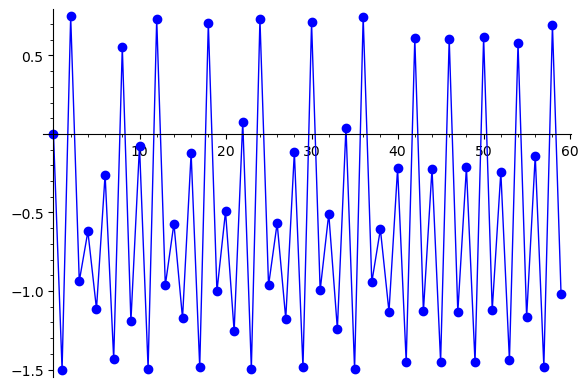

In [19]:
plot_show(f, -1.5, 60, 0)

c=  -0.950000000000000 x=  0
p+ =  1.59544511501033
{}
about to plot f from/to  -1.59544511501033 1.59544511501033


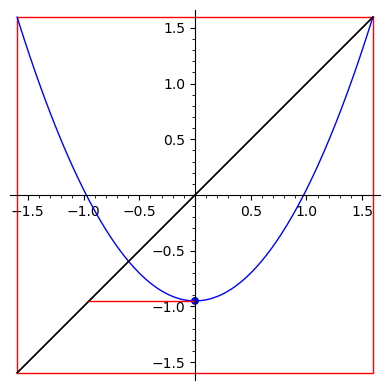

In [20]:
p1, p2 = plot_iteration_box(f, -3/4-0.2, 1, 0)
show(p1)

c=  -0.950000000000000 x=  -0.580000000000000
p+ =  1.59544511501033
{}
about to plot f from/to  -1.59544511501033 1.59544511501033


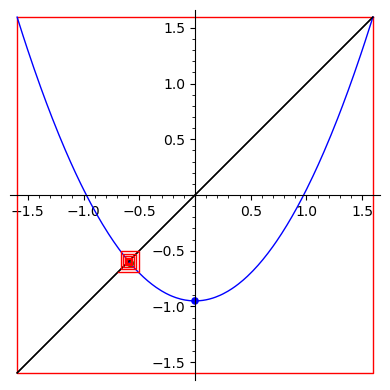

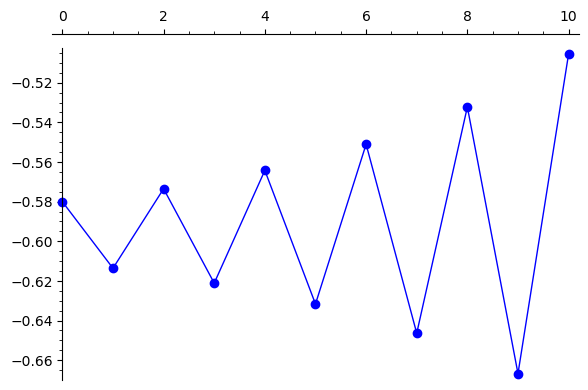

In [21]:
plot_show(f,-3/4-0.2,11,-0.58)

c=  -3/4 x=  -3/2
p+ =  3/2
{}
Fixed point 3/2  after  2  steps.
about to plot f from/to  -2.25000000000000 2.25000000000000


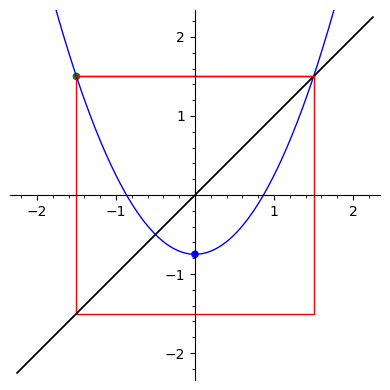

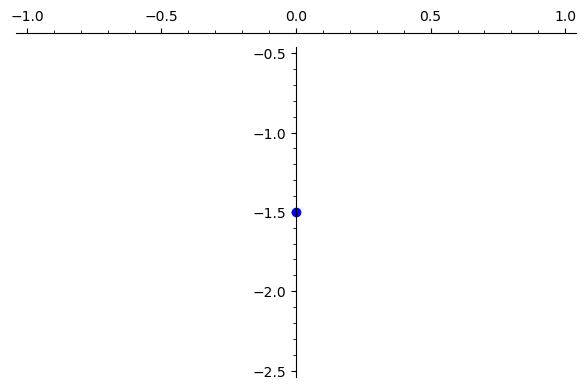

In [22]:
plot_show(f, -3/4, 3, (-3/4)*2)

c=  -0.550000000000000 x=  -1.39442000000000
p+ =  1.39442719099992
{}
about to plot f from/to  -2.09162678410000 2.09161392050000


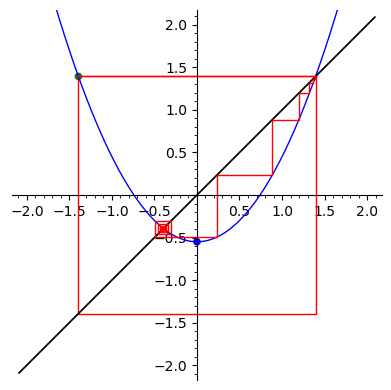

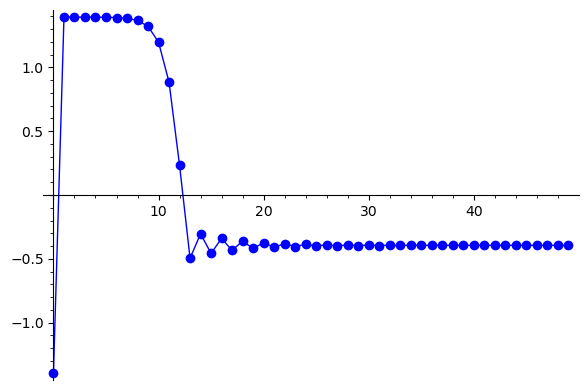

In [23]:
plot_show(f,-3/4+0.2,50, -3/2+0.10558)

c=  0.0100000000000000 x=  0
p+ =  0.989897948556636
{}
Fixed point 0.0101020514433644  after  11  steps.
about to plot f from/to  -0.989897948556636 0.989897948556636


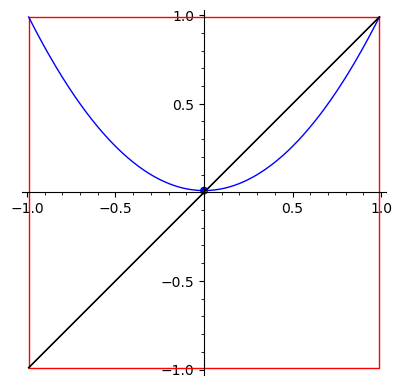

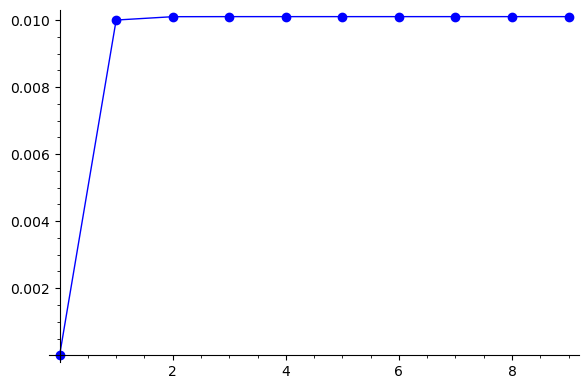

In [24]:
plot_show(f, 0.01, 20, 0)

c=  -3/4 x=  -1.49900000000000
p+ =  3/2
{}
about to plot f from/to  -2.24800025000000 2.24600125000000


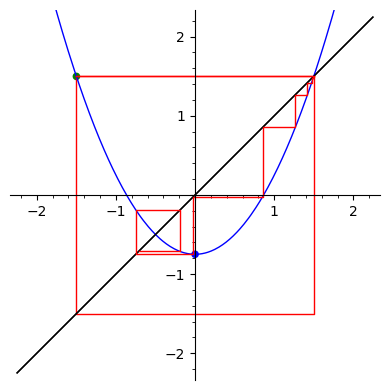

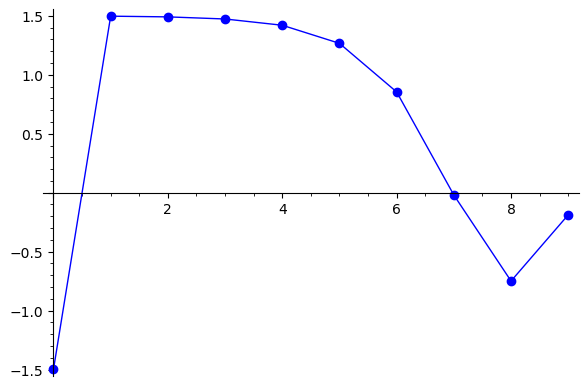

In [25]:
plot_show(f, -3/4, 10,  (-3/4)*2+0.001)

c=  -0.749000000000000 x=  -1.49900000000000
p+ =  1.49949987493746
{}
about to plot f from/to  -2.24825025000000 2.24725125000000


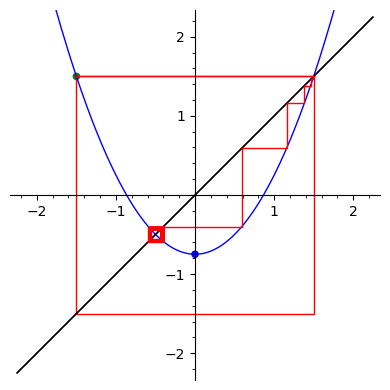

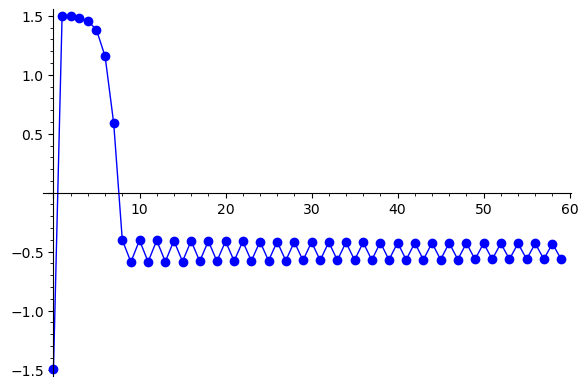

In [26]:
plot_show(f, -3/4+0.001, 60,  (-3/4)*2+0.001)

c=  -0.749000000000000 x=  -1.49949987493746
p+ =  1.49949987493746
{}
about to plot f from/to  -2.28404838601738 2.42324268046214


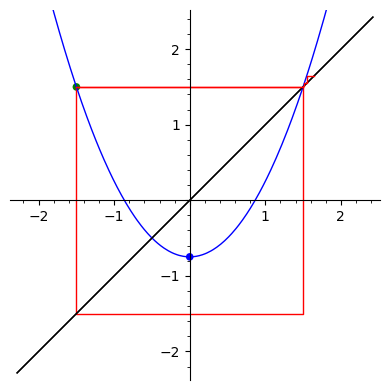

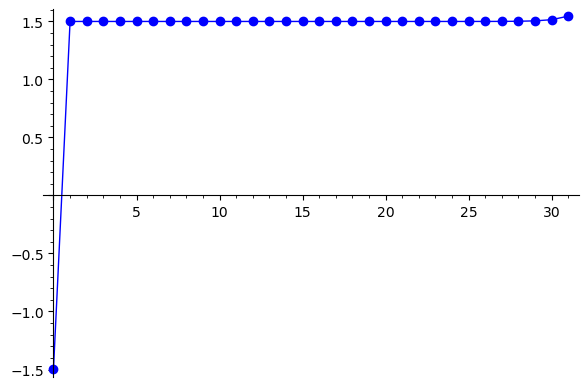

In [27]:
plot_show(f, -3/4+0.001, 32,  (-3/4)*2+0.00050012506253904)

c=  -0.749000000000000 x=  -1.49949987493746
p+ =  1.49949987493746
{}
about to plot f from/to  -2.24924981240619 2.24924981240619


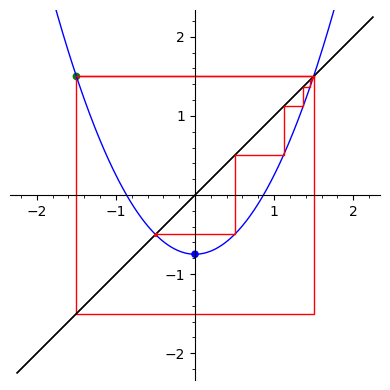

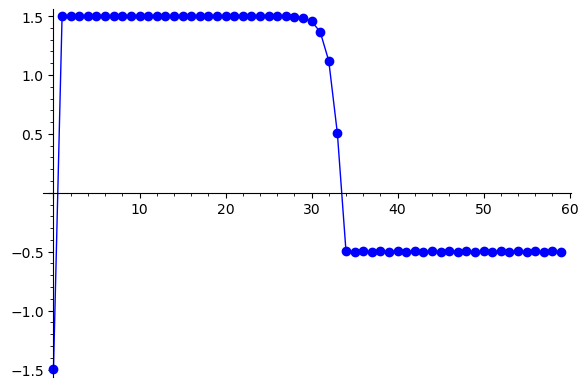

In [28]:
plot_show(f, -3/4+0.001, 60,  (-3/4)*2+0.00050012506253905)

In [29]:
(1/2)*(1+2*sqrt(0.999))-(3/2)

-0.000500125062539158

c=  -0.749000000000000 x=  -1.49949987493746
p+ =  1.49949987493746
{}
about to plot f from/to  -2.24924981240619 2.24924981240619


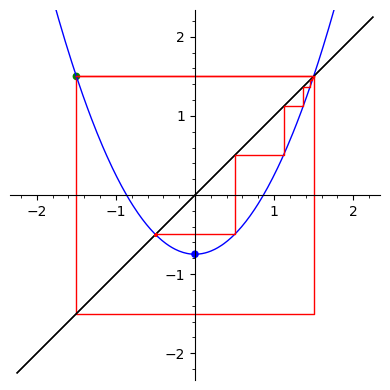

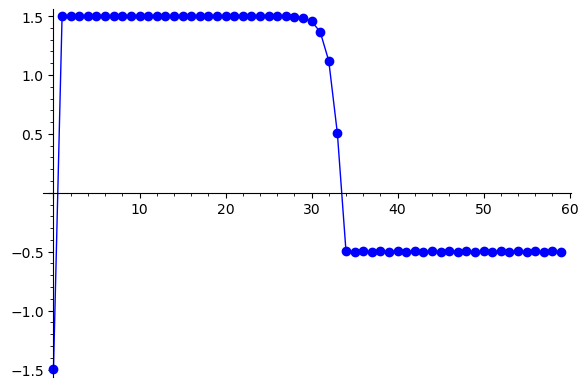

In [30]:
plot_show(f, -3/4+0.001, 60,  (-3/4)*2+0.00050012506253905)

c=  -0.749000000000000 x=  -1.49949987493746
p+ =  1.49949987493746
{}
about to plot f from/to  -2.24924981240619 2.24924981240619


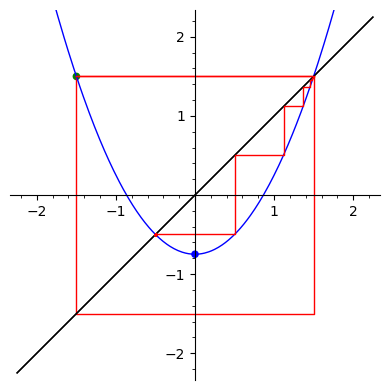

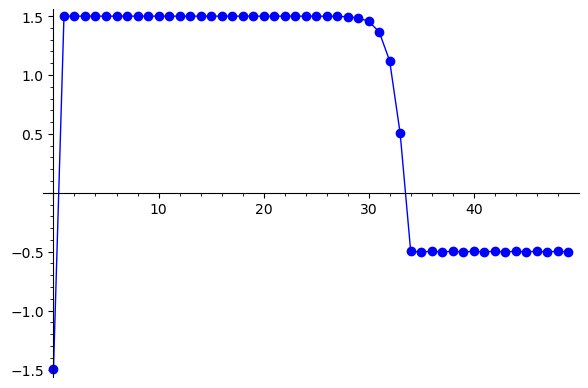

In [31]:
plot_show(f, -3/4+0.001, 50,  (-3/4)*2-(1/2)*(1+2*sqrt(0.999))+(3/2))

c=  -0.850000000000000 x=  -0.100000000000000
p+ =  1.54880884817015
{}
about to plot f from/to  -1.54880884817015 1.54880884817015


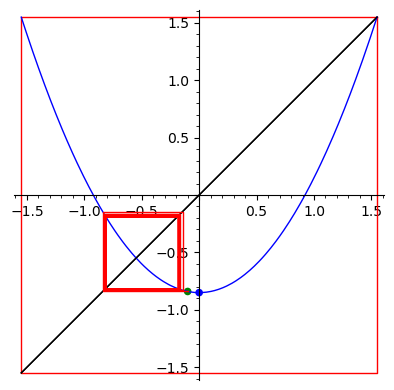

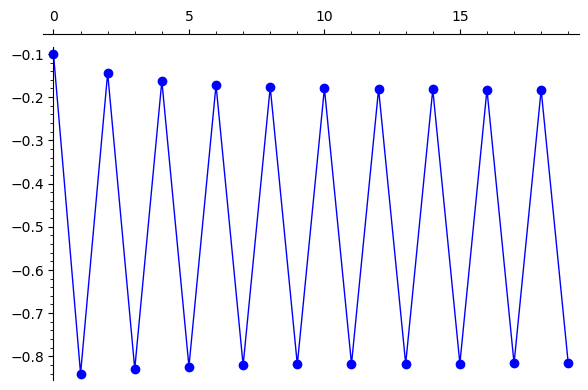

In [32]:
plot_show(f, -3/4 - 0.1, 20, -0.1)

c=  -0.850000000000000 x=  -0.300000000000000
p+ =  1.54880884817015
{}
about to plot f from/to  -1.54880884817015 1.54880884817015


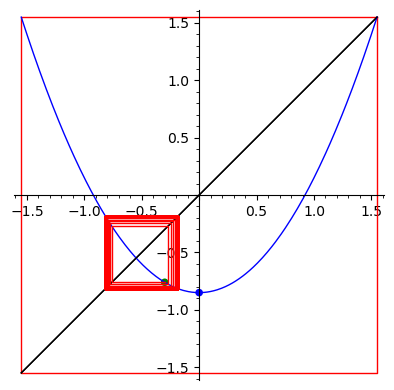

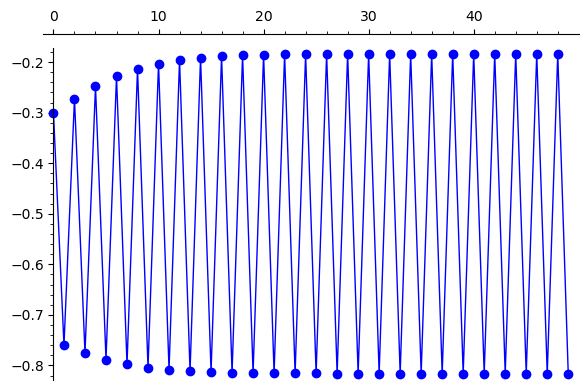

In [33]:
plot_show(f, -3/4 - 0.1, 50, -0.3)

c=  -1.90000000000000 x=  0
p+ =  1.96628782986152
{}
about to plot f from/to  -2.80250000000000 2.61250000000000
c=  -1.10000000000000 x=  0
p+ =  1.66189500386223
{}
about to plot f from/to  -1.66189500386223 1.66189500386223


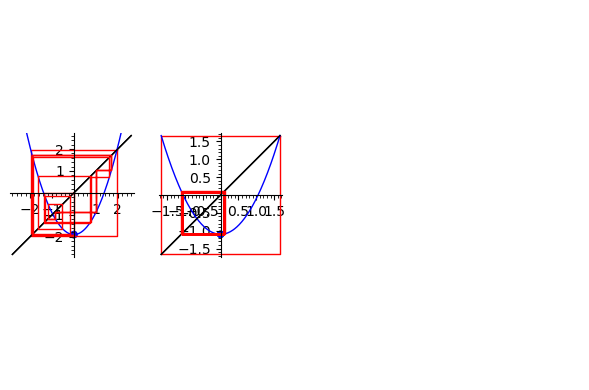

In [34]:
one = plot_iteration_box(f, -2.0+0.1, 20, 0)
two = plot_iteration_box(f, -1.0-0.1, 20, 0)
show(one[0], two[0])


In [35]:
f(-2,2)

2

about to plot f from/to  -1.50010000000000 0.500100010000000


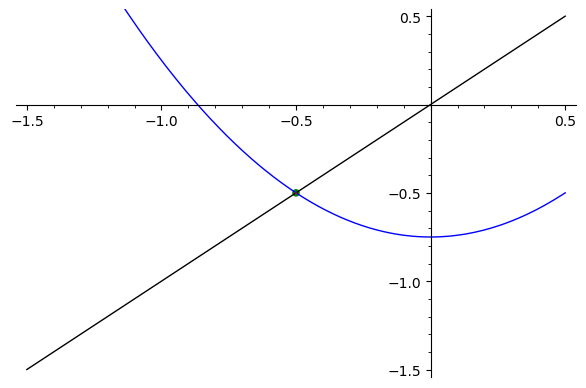

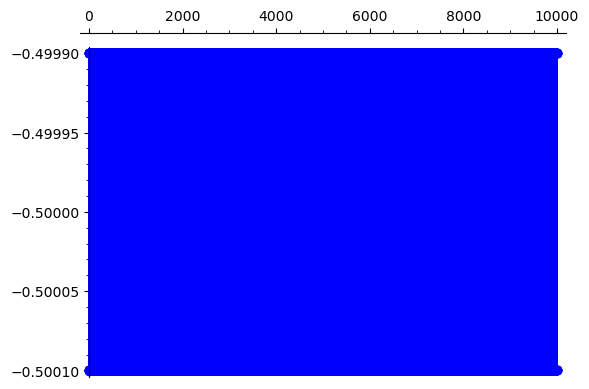

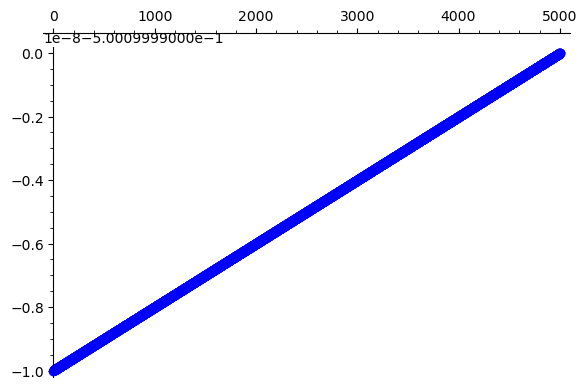

In [36]:

def plot_iteration2(f, c, N, x):
    
    x0 = x
    
    mins = x
    maxs = x


    zigzag = [[x, x]]
    for k in range(N):
        y = f(c, x)
        mins = min(mins, y)
        maxs = max(maxs, y)
 #       if x == y:
 #           print("Fixed point", x)
 #           print(zigzag)
 #           break
        zigzag.append([x, y])
        zigzag.append([y, y])
        x = y
    
    bufw = max( (maxs-mins)*(0.25), 1 )
    mins = mins-bufw
    maxs = maxs+bufw
    
    
    
    
    idline = line([[mins,mins], [maxs, maxs]], color='black')
    print("about to plot f from/to ", mins, maxs)
    p1 = plot(f(c, t), (t, mins, maxs), xmin=mins, xmax=maxs, ymin=mins, ymax=maxs)
    p1 = p1 + idline 
    p1 = p1 + line(zigzag, color='red')
    p1 = p1 + list_plot([[x0,x0]], color='green', size=30)
    plist = [zigzag[2*k][0] for k in range(N)]
    plist2 = [zigzag[4*k][0] for k in range(N/2)]
    p2 = list_plot(plist, plotjoined=True, marker="o")
    p3 = list_plot(plist2, plotjoined=True, marker="o")
   
    return(p1,p2,p3)

p1, p2, p3 = plot_iteration2(f, -3/4, 10000, -1+0.5-0.0001)
show(p1)
show(p2)
show(p3)

In [37]:
def complex_orbit(c, N, z=0, lastN=20):

    z_init = z  #save for printing and plotting.

    ps = []  # to hold the orbit.
    for k in range(N):
        #print(k, z)
        ps.append([z.real(), z.imag()])
        z = f(c,z)
        if abs(z) > 50:
            print("Escaping! z=", z)
            break
    #print(ps)
    
    #Plot the orbit with (default color) blue lines connecting black dots at orbit points.
    # aspect_ratio=1 forces the x and y scales to be equal.
    plot = line(ps, aspect_ratio=1, marker=".", markeredgecolor="black", markersize=2,thickness=0.25)
    
    #Overlay the lastN-1 blue lines with red lines, to show any attracting or eventual cycle
    # if the number of iterations is large enough.
    plot = plot + line(ps[-min(lastN,len(ps)):], aspect_ratio=1, color='red')
    
    print("Orbit begins at: ", z_init.real(),z_init.imag())
    
    # When we're plotting the critical orbit, show the line from the critical point to (c, f_c(c)) in green.
    if z_init == 0:
        plot = plot +line(ps[0:2], color='green',thickness=2)
    
    show(plot)
    return plot

Orbit begins at:  0 0


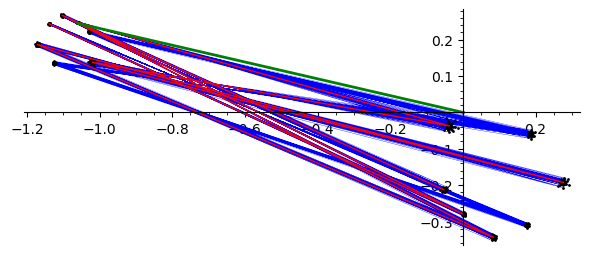

Orbit begins at:  0 0


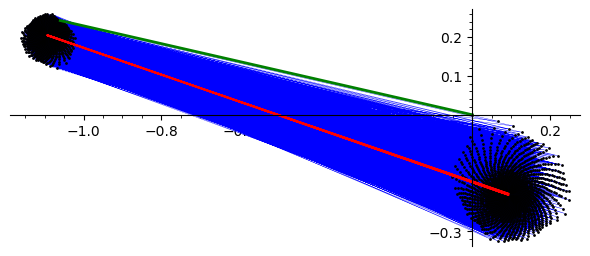

Orbit begins at:  0 0


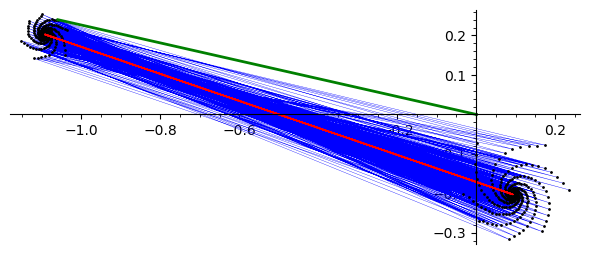

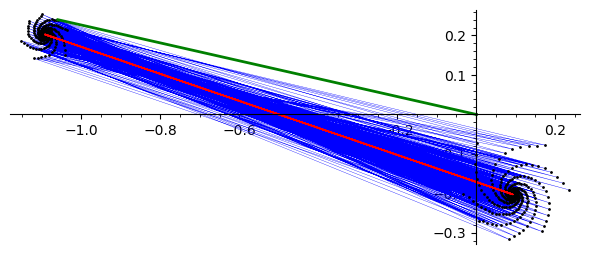

In [38]:
complex_orbit(-1.0599+0.2450*I, 10000, lastN=10)
complex_orbit(-1.0599+0.2425*I, 10000, lastN=10)
complex_orbit(-1.0599+0.2400*I, 2000, lastN=10)

Orbit begins at:  0 0


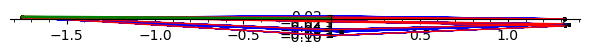

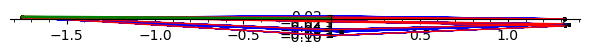

In [39]:
complex_orbit(-1.75+0.01125*I, 2000, lastN=10)

In [40]:
def complex_orbit_arbaspect(c, N, z=0, lastN=20):

    z_init = z

    ps = []
    for k in range(N):
        #print(k, z)
        ps.append([z.real(), z.imag()])
        z = f(c,z)
        if abs(z) > 50:
            print("Escaping! z=", z)
            break
    #print(ps)
    plot = line(ps, marker=".", markeredgecolor="black", markersize=2,thickness=0.25)
    plot = plot + line(ps[-min(lastN,len(ps)):], color='red') 
    print(z_init.real(),z_init.imag())
    plot = plot +line(ps[0:2], color='green',thickness=2)
    show(plot)
    return plot

0 0


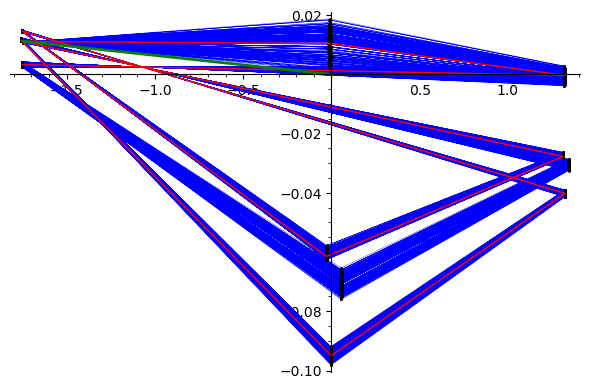

In [41]:
complex_orbit_arbaspect(-1.75+0.01125*I, 2000, lastN=10)
pass

Orbit begins at:  0 0


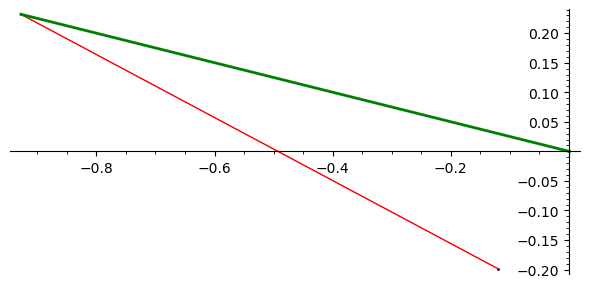

Orbit begins at:  0 0


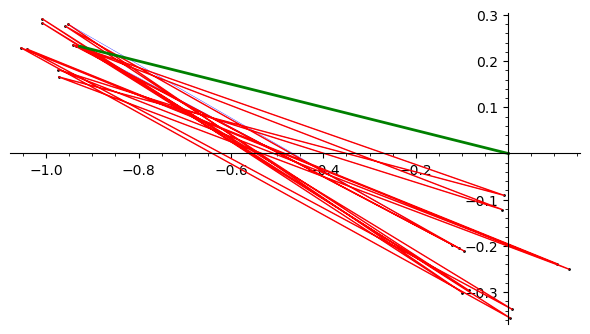

Orbit begins at:  0 0


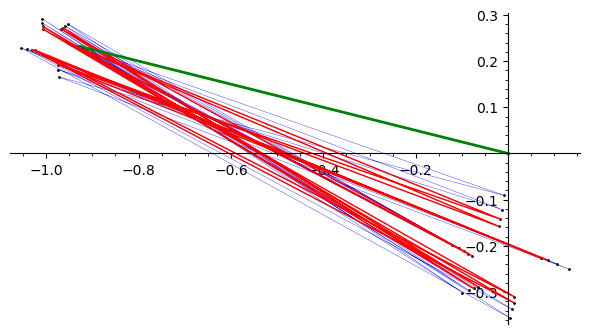

Orbit begins at:  0 0


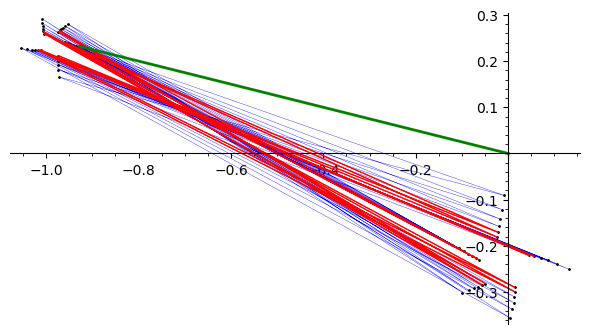

Orbit begins at:  0 0


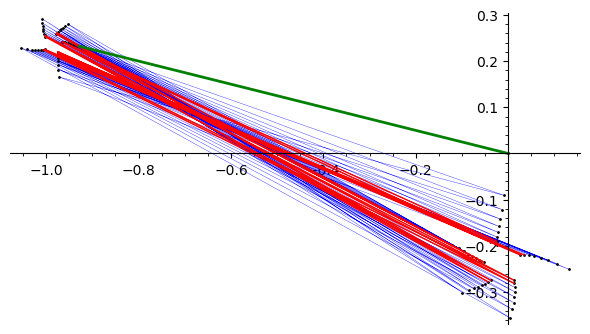

Orbit begins at:  0 0


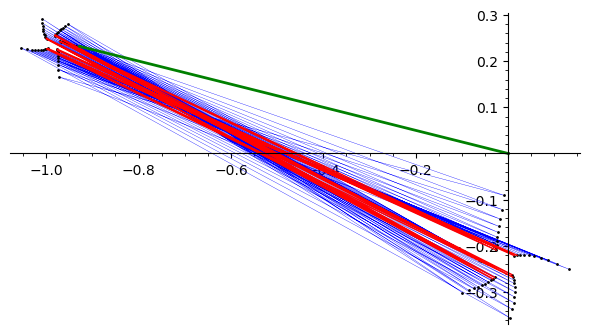

Orbit begins at:  0 0


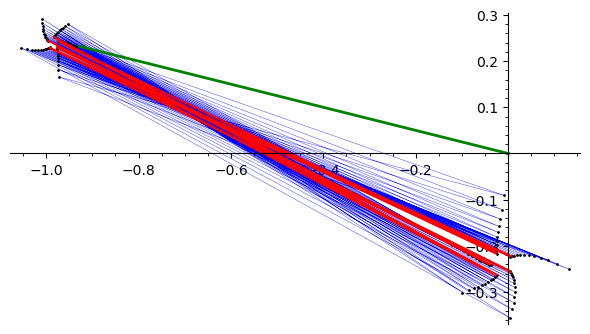

Orbit begins at:  0 0


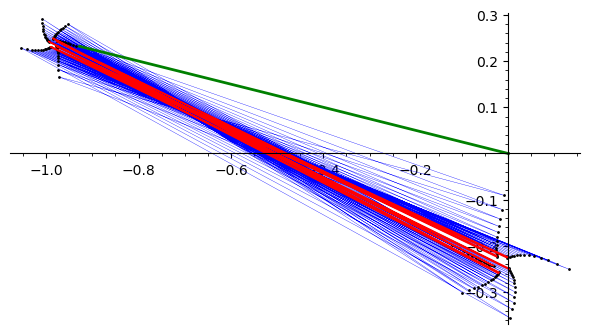

Orbit begins at:  0 0


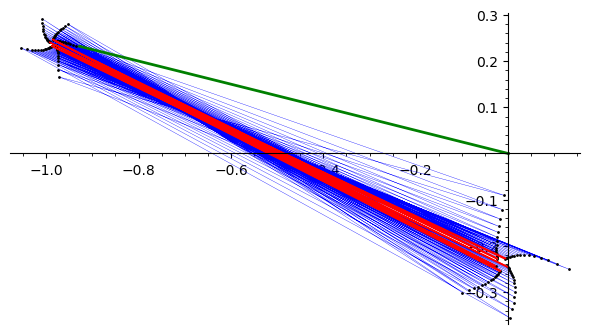

Orbit begins at:  0 0


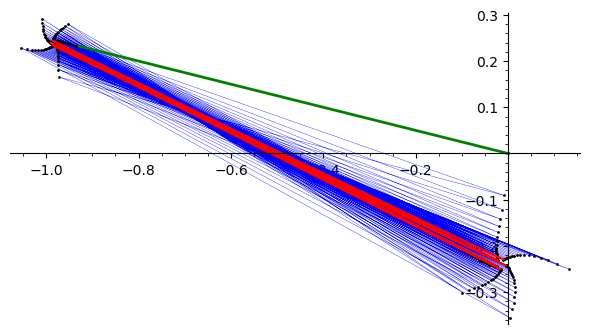

Orbit begins at:  0 0


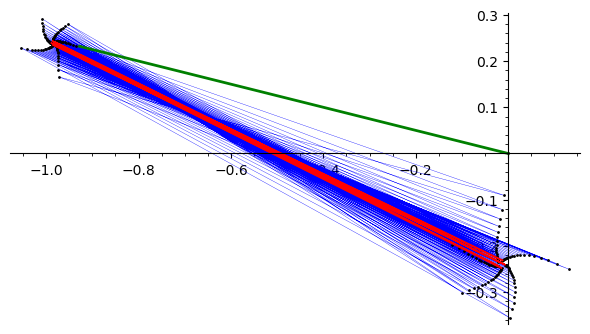

Orbit begins at:  0 0


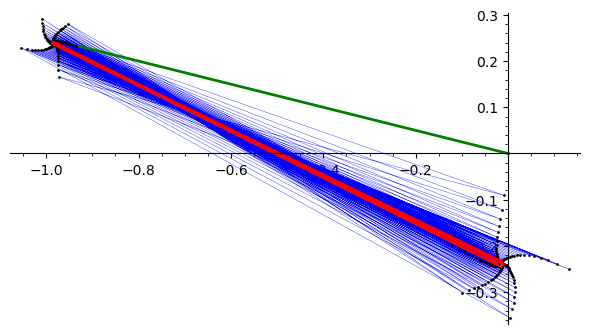

Orbit begins at:  0 0


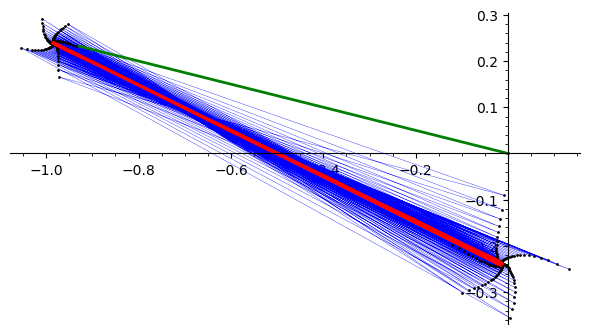

Orbit begins at:  0 0


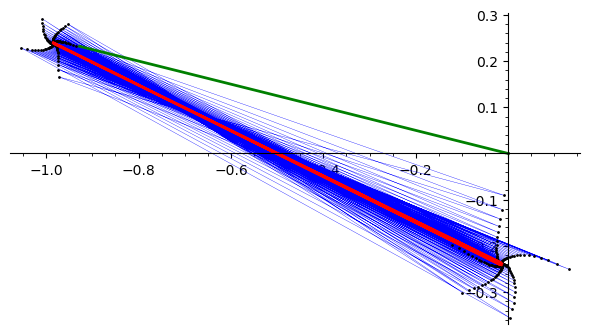

Orbit begins at:  0 0


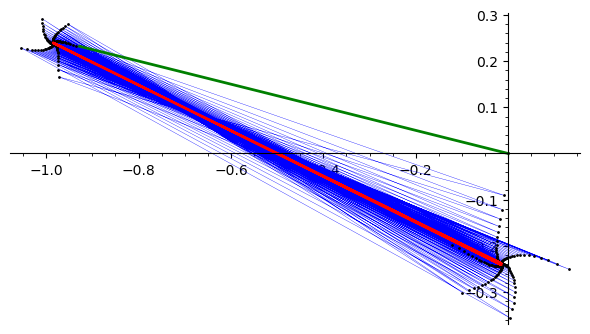

In [42]:
for i in range(3, 300,20):
    complex_orbit(-0.9276+0.2319*I, i, lastN=20)

Orbit begins at:  0 0


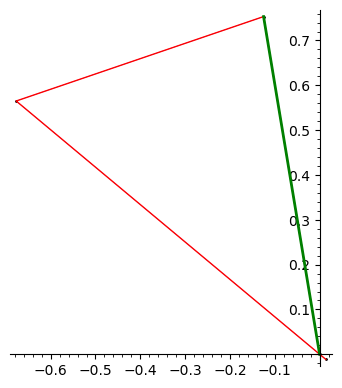

In [43]:
last_plot=complex_orbit(-0.1250+0.7533*I, 4, lastN=20)

Orbit begins at:  0 0


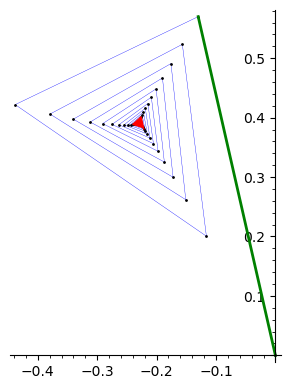

In [44]:
last_plot=complex_orbit(-0.1299+0.57*I, 50, lastN=20)

Orbit begins at:  0 0


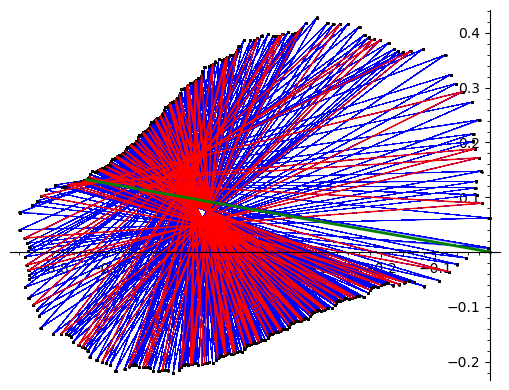

In [45]:
last_plot=complex_orbit(-0.7368+0.132*I, 60000, lastN=100)

In [ ]:
#Graphics.matplotlib?
show(last_plot,title="Heres my title",gridlines=True,frame=True,figsize=[10,10])

In [ ]:

show(last_plot)

In [ ]:
complex_orbit(-0.7368+0.13195*I, 70000, lastN=51)

In [ ]:
complex_orbit(-0.3207+0.61685*I, 112, lastN=6)

In [ ]:
complex_orbit(-0.36894+0.616548*I, 1000, lastN=8)

In [ ]:
neg3_4ths_minus_500=complex_orbit_arbaspect(-0.749+0.0001*I, 500, lastN=10)
neg3_4ths_minus_5000=complex_orbit_arbaspect(-0.749+0.0001*I, 10000, lastN=10)
neg3_4ths_plus =complex_orbit_arbaspect(-0.7505+0.0001*I, 5000, lastN=10)

In [ ]:
last_plot=complex_orbit_arbaspect(-1.75+0.01*I, 20000, lastN=13)
#period 12


In [ ]:
next_plot=complex_orbit_arbaspect(-1.75+0.009340134*I, 20000, lastN=13)
#wilder period 13

In [ ]:
per12=complex_orbit_arbaspect(-1.750453  + 0.009845*I, 20000, lastN=13)
per3 =complex_orbit_arbaspect(-1.7500554 + 0.009286*I, 20000, lastN=13)


In [ ]:
show(last_plot)
saved_plot=complex_orbit_arbaspect(-1.576110189+0.000007965*I, 30, lastN=5)

In [ ]:
complex_orbit_arbaspect(-1.7736-0.00002*I, 1000, lastN=13)
complex_orbit_arbaspect(-1.7736-0.00001*I, 1000, lastN=13)
complex_orbit_arbaspect(-1.7736-0.000005*I, 1000, lastN=13)
pass

In [ ]:
show(saved_plot)